In [7]:
# %pip install -r requirements.txt
%pip install pandas

  Using cached pandas-2.1.3-cp311-cp311-win_amd64.whl.metadata (18 kB)
  Using cached pytz-2023.3.post1-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2023.3-py2.py3-none-any.whl (341 kB)
Using cached pandas-2.1.3-cp311-cp311-win_amd64.whl (10.6 MB)
Using cached pytz-2023.3.post1-py2.py3-none-any.whl (502 kB)
Note: you may need to restart the kernel to use updated packages.


              barcode  present  xgrad  ygrad     x     y
0  ACGCCTGACACGCGCT-1        0      0      0  2510  2174
1  TACCGATCCAACACTT-1        0      1      1  2630  2243
2  ATTAAAGCGGACGAGC-1        0      0      2  2511  2312
3  GATAAGGGACGATTAG-1        0      1      3  2631  2381
4  GTGCAAATCACCAATA-1        0      0      4  2511  2450


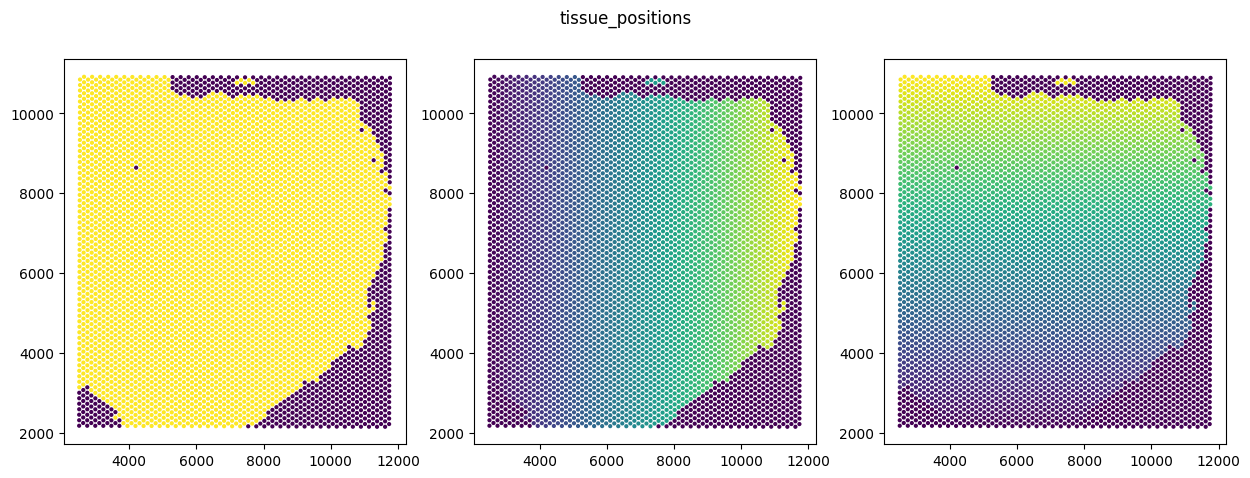

In [114]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# Read the CSV file and create a dataframe
df = pd.read_csv(os.path.join('data\data1\spatial', f'tissue_positions_list.csv'))
# Display the dataframe
print(df.head())
#display the 3 graps of the dataframe
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('tissue_positions')
ax1.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present']), cmap = 'viridis', s = 4)
ax2.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present'])*np.array(df['xgrad']), cmap = 'viridis', s = 4)
ax3.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present'])*np.array(df['ygrad']), cmap = 'viridis', s = 4)
plt.show()

              barcode layer_guess
0  AAACAACGAATAGTTC-1          -1
1  AAACAAGTATCTCCCA-1          L3
2  AAACAATCTACTAGCA-1          L1
3  AAACACCAATAACTGC-1          WM
4  AAACAGCTTTCAGAAG-1          L6
              barcode  present  xgrad  ygrad     x     y
0  ACGCCTGACACGCGCT-1        0      0      0  2510  2174
1  TACCGATCCAACACTT-1        0      1      1  2630  2243
2  ATTAAAGCGGACGAGC-1        0      0      2  2511  2312
3  GATAAGGGACGATTAG-1        0      1      3  2631  2381
4  GTGCAAATCACCAATA-1        0      0      4  2511  2450
{'L2', 'L6', 'L4', 'WM', 'L3', 'L5', '-1', 'L1'}
              barcode  present  xgrad  ygrad     x     y layer_guess
0  ACGCCTGACACGCGCT-1        0      0      0  2510  2174         NaN
1  TACCGATCCAACACTT-1        0      1      1  2630  2243         NaN
2  ATTAAAGCGGACGAGC-1        0      0      2  2511  2312         NaN
3  GATAAGGGACGATTAG-1        0      1      3  2631  2381         NaN
4  GTGCAAATCACCAATA-1        0      0      4  2511  2450    

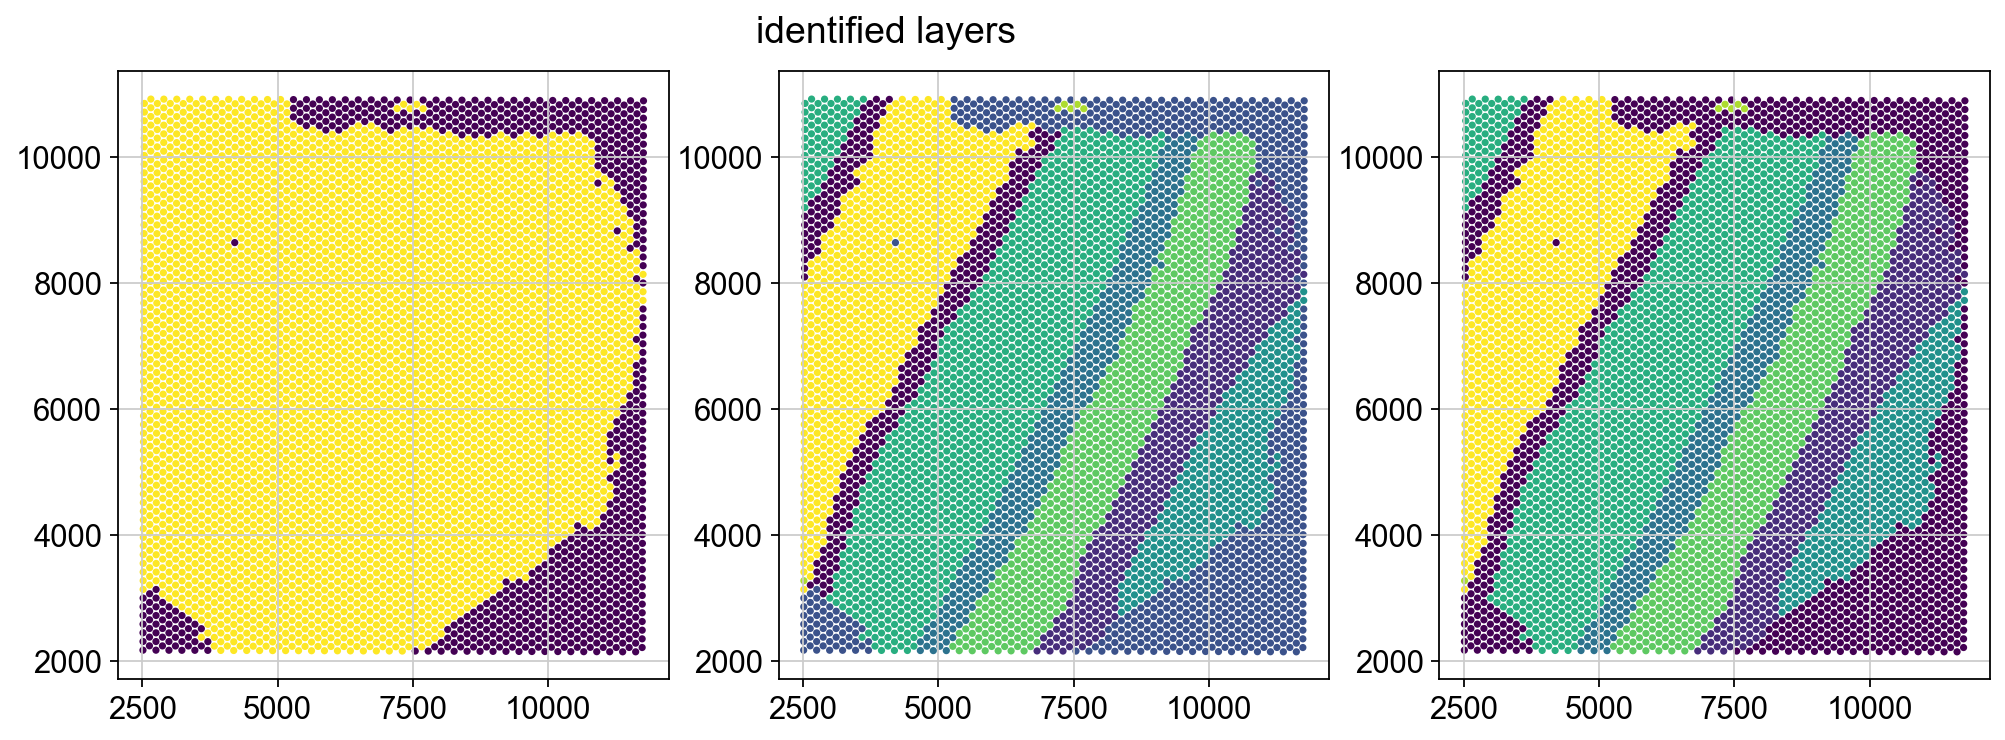

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
# Read the CSV file and create a dataframe
df = pd.read_csv(os.path.join('data\data1\spatial', f'tissue_positions_list.csv'))
# metadata = 'data\data1\metadata.tsv'
metadata = pd.read_csv(os.path.join('data\data1', f'metadata.tsv'),sep='\t')
# Display the dataframe
print(metadata.head())
print(df.head())
layers = set(metadata['layer_guess'])
print(layers)

#if barcode in df['barcode'] matches a barcode in metadata['barcode'], then add the meta['layer_guess'] to df['layer_guess'] else put NAN
df['layer_guess'] = df['barcode'].apply(lambda x: metadata['layer_guess'][metadata['barcode'] == x].values[0] if x in metadata['barcode'].values else np.nan)
#assign a df['color'] to each in set(df['layer_guess'])
colors = set(df['layer_guess'])
print(df.head())
print(colors)
df['color'] = df['layer_guess'].apply(lambda x: list(colors).index(x))

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('identified layers')
ax1.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present']), cmap = 'viridis', s = 5)
ax2.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['color']), cmap = 'viridis', s = 5)
ax3.scatter(np.array(df['x']), np.array(df['y']), c = np.array(df['present'])*np.array(df['color']), cmap = 'viridis', s = 5)
plt.show()

In [29]:
print(df.head())

              barcode  present  xgrad  ygrad     x     y layer_guess  color
0  ACGCCTGACACGCGCT-1        0      0      0  2510  2174         NaN      2
1  TACCGATCCAACACTT-1        0      1      1  2630  2243         NaN      2
2  ATTAAAGCGGACGAGC-1        0      0      2  2511  2312         NaN      2
3  GATAAGGGACGATTAG-1        0      1      3  2631  2381         NaN      2
4  GTGCAAATCACCAATA-1        0      0      4  2511  2450         NaN      2


In [1]:
%pip install anndata
%pip install scanpy

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from anndata import AnnData
import scanpy as sc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

In [31]:
df = pd.read_csv(os.path.join('data\data1\spatial', f'tissue_positions_list.csv'))
metadata = pd.read_csv(os.path.join('data\data1', f'metadata.tsv'),sep='\t')
layers = set(metadata['layer_guess'])
df['layer_guess'] = df['barcode'].apply(lambda x: metadata['layer_guess'][metadata['barcode'] == x].values[0] if x in metadata['barcode'].values else np.nan)
colors = set(df['layer_guess'])
df['color'] = df['layer_guess'].apply(lambda x: list(colors).index(x))
print(df.head())

              barcode  present  xgrad  ygrad     x     y layer_guess  color
0  ACGCCTGACACGCGCT-1        0      0      0  2510  2174         NaN      2
1  TACCGATCCAACACTT-1        0      1      1  2630  2243         NaN      2
2  ATTAAAGCGGACGAGC-1        0      0      2  2511  2312         NaN      2
3  GATAAGGGACGATTAG-1        0      1      3  2631  2381         NaN      2
4  GTGCAAATCACCAATA-1        0      0      4  2511  2450         NaN      2


In [34]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_header()
sc.settings.set_figure_params(dpi=80, facecolor='white')
adata = sc.read(os.path.join('data\data1',f'DLPFC_single_cell_data_downsampled.h5ad'))
# df_meta = pd.read_csv(os.path.join('data\data1', f'metadata.tsv'),sep='\t')
df = pd.read_csv(os.path.join('data\data1\spatial', f'tissue_positions_list.csv'))
metadata = pd.read_csv(os.path.join('data\data1', f'metadata.tsv'),sep='\t')
layers = set(metadata['layer_guess'])
df['layer_guess'] = df['barcode'].apply(lambda x: metadata['layer_guess'][metadata['barcode'] == x].values[0] if x in metadata['barcode'].values else np.nan)
colors = set(df['layer_guess'])
df['color'] = df['layer_guess'].apply(lambda x: list(colors).index(x))
df_meta = df
print(df_meta.head())
label = pd.Categorical(df_meta['layer_guess']).codes 
# adata = adata[label != -1]
# label = label[label != -1]
# n_clusters = label.max()+1

# pred = pd.read_csv(f'output/{args.name}_pred.csv')['cluster_labels']
# adata.obs['label'] = df_meta['layer_guess']
# adata.obs['pred'] = pred.array.astype(str)

# adata.obsm['ConGI'] = z
# sc.pp.neighbors(adata, use_rep='ConGI')
# sc.tl.umap(adata)


scanpy==1.9.6 anndata==0.10.3 umap==0.5.5 numpy==1.26.2 scipy==1.11.4 pandas==2.1.3 scikit-learn==1.3.2 statsmodels==0.14.0 pynndescent==0.5.11


d:\Github\CS690\FinalProject\.venv\Lib\site-packages\anndata\__init__.py:51: FutureWarning: `anndata.read` is deprecated, use `anndata.read_h5ad` instead. `ad.read` will be removed in mid 2024.
  warnings.warn(


              barcode  present  xgrad  ygrad     x     y layer_guess  color
0  ACGCCTGACACGCGCT-1        0      0      0  2510  2174         NaN      2
1  TACCGATCCAACACTT-1        0      1      1  2630  2243         NaN      2
2  ATTAAAGCGGACGAGC-1        0      0      2  2511  2312         NaN      2
3  GATAAGGGACGATTAG-1        0      1      3  2631  2381         NaN      2
4  GTGCAAATCACCAATA-1        0      0      4  2511  2450         NaN      2


In [44]:
print(adata)
print(set(df['layer_guess']))
print(set(df['color']))
print(set(label))
print(label.size)

AnnData object with n_obs × n_vars = 20904 × 59074
    obs: 'ground_truth', 'batch'
{'L2', 'L6', nan, 'L4', 'WM', 'L3', 'L5', '-1', 'L1'}
{0, 1, 2, 3, 4, 5, 6, 7, 8}
{0, 1, 2, 3, 4, 5, 6, 7, -1}
4992


In [27]:
print('\nAdata obs: \n', adata.obs,'\n')
print('\nGround truth layers: \n',set(adata.obs['ground_truth']))
print('\nGround truth batch: \n',set(adata.obs['batch']))
print('\nAdata var: \n',adata.var.keys(),adata.var,'\n')
print(adata.obsm)
print('\nAdata X: \n',adata.X)


Adata obs: 
                                 ground_truth batch
GAGGTGAAGTGCGTGA-1_4899_BA24-0   Neu-NRGN-II     0
AGAGCGAAGCACCGTC-1_5554_BA24-0   Neu-NRGN-II     0
CACCAGGGTGTATGGG-1_5841_BA9-0    Neu-NRGN-II     0
CAGAGAGTCAGTTTGG-1_5841_BA9-0    Neu-NRGN-II     0
AGTGAGGTCATACGGT-1_5387_BA9-0    Neu-NRGN-II     0
...                                      ...   ...
GCCAAATCACCAGTTA-1_6032_BA24-16       AST-PP    16
AAAGATGGTACCGTTA-1_5945_PFC-16        AST-PP    16
CCGTACTTCACGATGT-1_5531_BA24-16       AST-PP    16
CACAGGCTCTGGAGCC-1_5565_BA9-16        AST-PP    16
GACGGCTGTTCCTCCA-1_5939_BA9-16        AST-PP    16

[20904 rows x 2 columns] 


Ground truth layers: 
 {'Oligodendrocytes', 'Endothelial', 'IN-PV', 'Neu-mat', 'IN-VIP', 'OPC', 'AST-FB', 'L5/6-CC', 'L2/3', 'L4', 'AST-PP', 'Neu-NRGN-I', 'L5/6', 'Neu-NRGN-II', 'Microglia', 'IN-SV2C', 'IN-SST'}

Ground truth batch: 
 {'6', '11', '8', '1', '16', '10', '4', '12', '13', '3', '7', '14', '2', '9', '0', '15', '5'}

Adata var: 
 Ind